In [ ]:
!pip install torchdata
!pip install -U torchtext==0.13.0
!pip install datasets
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torch-1.12.0-cp37-cp37m-manylinux1_x86_64.whl (776.3 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
    Uninstalling torch-1.12.1:
      Successfully uninstalled torch-1.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchdata 0.4.1 requires torch==1.12.1, but you have torch 1.12.0 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 5.1 MB/s 
     |████████████████████████████████| 212 kB 76.9 MB/s 
     |████████████████████████████████| 101 kB 13.8 MB/s 
     |████████████████████████████████| 115 kB 85.6 MB/s 
     |████████████████████████████████| 141 kB 80.4 MB/s 
     |████████████████████████████████| 596 kB 73.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torchtext
import datasets

import matplotlib.pyplot as plt
%matplotlib inline

import torch.optim as optim

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
print(stops)

{'or', 'they', "won't", 'doesn', 'didn', 'are', "couldn't", 'our', "shan't", 'should', "isn't", 'when', 'ours', 're', 'mightn', 'there', 'off', "shouldn't", 'being', 'your', 'some', 'before', 'through', 'll', 'isn', 'yours', "aren't", 'where', 'what', 'after', 'and', 'it', "doesn't", 's', 'few', 'ourselves', 'hadn', 'the', 'aren', 'him', 'having', 'nor', 'other', "should've", 'a', "hasn't", 'do', 'than', 'them', 'her', 'why', 'myself', 'yourselves', "weren't", 'same', 'was', "it's", 'haven', 'which', 'of', 'no', 'up', 'an', 'as', "she's", 'its', 'out', 'only', 'am', 'has', 'she', "that'll", 'on', "mightn't", 'his', 'me', 'shouldn', 'above', 'further', 'such', "you'll", 'against', 'can', 'each', "hadn't", 'been', 'about', 'he', 'to', 'we', 't', 'very', 'for', 'whom', 'you', 'will', 'ain', "haven't", "wasn't", "needn't", 'hasn', 'into', 'this', 'not', 'these', "wouldn't", 'with', 'so', 'but', 'won', 'wouldn', 'both', 'd', 'y', 'most', 'all', 'wasn', 'from', 'those', 'because', 'shan', 'w

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
# get dataset from hugging face library
train_data, test_data = datasets.load_dataset('imdb', split = ['train', 'test'])

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# reshuffle training and test datasets (randomize)
train_data = train_data.shuffle()
test_data = test_data.shuffle()

In [ ]:
train_data[:10]

{'label': [1, 1, 0, 1, 1, 1, 1, 0, 1, 1],
 'text': ["I've just seen The Saint Strikes Back for the first time and found it quite good. This was George Sanders's first appearance as the Saint, where he replaces Louis Hayward.<br /><br />In this one, the Saint is sent to San Francisco to investigate a shooting at a night club. With the help of his acquaintance Inspector Fernack who has come down from New York, they help a daughter of a crime boss.<br /><br />Joining Sanders in the cast are Wendy Barrie and Jonathan Hale.<br /><br />Not a bad Saint movie. Worth seeing.<br /><br />Rating: 3 stars out of 5.",
  "The kids I took to this movie loved it (four children, ages 9 to 12 years; they would have given it 10 stars). Emma Roberts was adorable in the title role. (Expect to see more of this next-generation Roberts in the future.) After being over exposed to the likes of Britney Spears, Lindsay Lohan, and Paris Hilton, it was refreshing to see a girl who didn't look like she worked the str

In [ ]:
from torchtext.data.utils import get_tokenizer

# use a standard english tokenizer
tokenizer = get_tokenizer('basic_english')

# function that tokenizes the data and removes stopwords
def tokenize_data(ex):
    stop_words = set(stopwords.words('english'))
    tokens = tokenizer(ex['text'])
    tokens_without_stopwords = [token for token in tokens if token not in stop_words]
    return {'tokens': tokens_without_stopwords}

train_data = train_data.map(tokenize_data)
test_data = test_data.map(tokenize_data)

  0%|          | 0/25000 [00:00<?, ?ex/s]

  0%|          | 0/25000 [00:00<?, ?ex/s]

In [ ]:
train_data, test_data

(Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 25000
 }), Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 25000
 }))

In [ ]:
#Documentation: https://huggingface.co/docs/datasets/v2.4.0/en/package_reference/main_classes#datasets.Dataset.train_test_split
# split the training data into training and validation data
train_valid_data = train_data.train_test_split() # default test_size is 0.25
train_data = train_valid_data['train']
valid_data = train_valid_data['test']

In [ ]:
train_data, valid_data, test_data

(Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 18750
 }), Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 6250
 }), Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 25000
 }))

In [ ]:
from torchtext.vocab import Vocab, build_vocab_from_iterator

UNK_IDX, PAD_IDX = 0, 1
special_symbols = ['<unk>', '<pad>']

# build vocab from the text tokens from training data
vocab = build_vocab_from_iterator(train_data['tokens'], min_freq = 50, specials = special_symbols)
#vocab = build_vocab_from_iterator(train_data['tokens'], max_tokens = 32, specials = special_symbols)

# set unknown index as the default
vocab.set_default_index(UNK_IDX)

len(vocab)

5721

In [ ]:
# save the vocab object
torch.save(vocab, 'RNN_vocab.pth')

In [ ]:
# transform the tokens into numerical values 
def transform_tokens_idxs(ex):
  idxs = {'idxs': [vocab[token] for token in ex['tokens']]}
  return idxs

# add a column with the idxs
train_data = train_data.map(transform_tokens_idxs)
valid_data = valid_data.map(transform_tokens_idxs)
test_data = test_data.map(transform_tokens_idxs)

  0%|          | 0/18750 [00:00<?, ?ex/s]

  0%|          | 0/6250 [00:00<?, ?ex/s]

  0%|          | 0/25000 [00:00<?, ?ex/s]

In [ ]:
train_data, valid_data, test_data

(Dataset({
     features: ['text', 'label', 'tokens', 'idxs'],
     num_rows: 18750
 }), Dataset({
     features: ['text', 'label', 'tokens', 'idxs'],
     num_rows: 6250
 }), Dataset({
     features: ['text', 'label', 'tokens', 'idxs'],
     num_rows: 25000
 }))

In [ ]:
from torch.nn.utils.rnn import pad_sequence

# collate function to put examples in batches 
def collate_batch(batch):
  batch_idxs, batch_labels = [], []

  for b in batch: 
    #print(b)
    batch_idxs.append(torch.LongTensor(b['idxs']))
    batch_labels.append(torch.tensor(b['label']))

  # pad idxs that are shorter than the longest sentence
  batch_idxs = pad_sequence(batch_idxs, batch_first = False, padding_value = PAD_IDX)
  batch_labels = torch.stack(batch_labels)

  batch = {'idxs': batch_idxs,
           'labels': batch_labels}
  
  return batch

In [ ]:
def get_accuracy(predictions, actual_labels):
    batch_size = predictions.shape[0]
    predicted_labels = predictions.argmax(1)
    num_correct = (predicted_labels == actual_labels).sum()
    accuracy = num_correct / batch_size
    return accuracy

In [ ]:
GRAD_CLIP = 1

def train(dataloader, model, optimizer, criterion):
    model.train()

    epoch_loss, epoch_accuracy = 0, 0

    for idx, batch in enumerate(dataloader):
        token_ids = batch['idxs'].to(device)
        labels = batch['labels'].to(device)
        model.zero_grad()
        predictions = model(token_ids)
        loss = criterion(predictions, labels)
        accuracy = get_accuracy(predictions, labels)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), GRAD_CLIP)
        optimizer.step()
        epoch_loss += loss.item()
        epoch_accuracy += accuracy.item()

    return epoch_loss / len(dataloader), epoch_accuracy / len(dataloader)

In [ ]:
def evaluate(dataloader, model, criterion):
    model.eval()

    epoch_loss, epoch_accuracy = 0, 0

    with torch.no_grad():
        for idx, batch in enumerate(dataloader):
            token_ids = batch['idxs'].to(device)
            labels = batch['labels'].to(device)
            predictions = model(token_ids)
            loss = criterion(predictions, labels)
            accuracy = get_accuracy(predictions, labels)
            epoch_loss += loss.item()
            epoch_accuracy += accuracy.item()

    return epoch_loss / len(dataloader), epoch_accuracy / len(dataloader)

In [ ]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
# SIMPLE RNN MODEL
from torch import nn

class RNN(nn.Module):
# I referred to this tutorial for help: https://github.com/bentrevett/pytorch-sentiment-analysis/blob/master/1%20-%20Simple%20Sentiment%20Analysis.ipynb
    def __init__(self, vocab_size, emb_dim, hid_dim, output_dim):
        super().__init__()
        # embedding layer
        self.embedding = nn.Embedding(vocab_size, emb_dim)
        # RNN layer
        self.rnn = nn.RNN(emb_dim, hid_dim) # default batch_first is False
        # adding dropout layer
        self.dropout = nn.Dropout(0.75)
        # linear layer
        self.linear = nn.Linear(hid_dim, output_dim)
    def forward(self, text):
        # input text is dimension [seq_len, batch_size]
        # apply embeddings to the words
        embedded = self.embedding(text)
        # embedded is dimension [seq_len, batch_size, emb_dim] because batch_first = False
        # run through RNN
        output, hidden = self.rnn(embedded)
        # hidden is dimension [1, batch_size, hid_dim]
        last_output = output[-1]
        last_output = self.dropout(last_output)
        # get the predictions
        scores = self.linear(last_output)
        # scores should have the dimension [batch_size, output_dim]
        return scores

Epoch: 01 | Time: 0m 10s
train_loss: 3.731, train_acc: 0.502
valid_loss: 1.694, valid_acc: 0.493
Epoch: 02 | Time: 0m 10s
train_loss: 1.242, train_acc: 0.500
valid_loss: 0.715, valid_acc: 0.494
Epoch: 03 | Time: 0m 10s
train_loss: 0.761, train_acc: 0.500
valid_loss: 0.717, valid_acc: 0.496
Epoch: 04 | Time: 0m 11s
train_loss: 0.709, train_acc: 0.504
valid_loss: 0.699, valid_acc: 0.506
Epoch: 05 | Time: 0m 11s
train_loss: 0.709, train_acc: 0.501
valid_loss: 0.705, valid_acc: 0.508
Epoch: 06 | Time: 0m 10s
train_loss: 0.716, train_acc: 0.501
valid_loss: 0.713, valid_acc: 0.503
Epoch: 07 | Time: 0m 10s
train_loss: 0.701, train_acc: 0.503
valid_loss: 0.711, valid_acc: 0.502
Epoch: 08 | Time: 0m 10s
train_loss: 0.705, train_acc: 0.499
valid_loss: 0.716, valid_acc: 0.503
Epoch: 09 | Time: 0m 10s
train_loss: 0.711, train_acc: 0.498
valid_loss: 0.712, valid_acc: 0.503
Epoch: 10 | Time: 0m 10s
train_loss: 0.720, train_acc: 0.495
valid_loss: 0.728, valid_acc: 0.503
Epoch: 11 | Time: 0m 10s
train

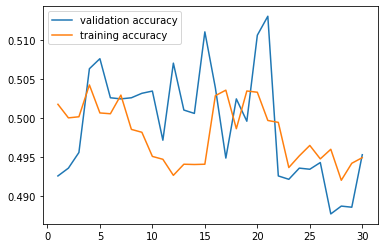

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 1000

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 128
HIDDEN_DIM = 256
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-2)

# RNN (with vocab min freq = 100 and batch size = 1000 and lr=5e-2 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 9s
train_loss: 1.827, train_acc: 0.497
valid_loss: 2.033, valid_acc: 0.480
Epoch: 02 | Time: 0m 9s
train_loss: 1.452, train_acc: 0.498
valid_loss: 1.741, valid_acc: 0.506
Epoch: 03 | Time: 0m 9s
train_loss: nan, train_acc: 0.502
valid_loss: nan, valid_acc: 0.506
Epoch: 04 | Time: 0m 10s
train_loss: nan, train_acc: 0.499
valid_loss: nan, valid_acc: 0.506
Epoch: 05 | Time: 0m 9s
train_loss: nan, train_acc: 0.499
valid_loss: nan, valid_acc: 0.506
Epoch: 06 | Time: 0m 9s
train_loss: nan, train_acc: 0.499
valid_loss: nan, valid_acc: 0.506
Epoch: 07 | Time: 0m 9s
train_loss: nan, train_acc: 0.499
valid_loss: nan, valid_acc: 0.506
Epoch: 08 | Time: 0m 9s
train_loss: nan, train_acc: 0.499
valid_loss: nan, valid_acc: 0.506
Epoch: 09 | Time: 0m 9s
train_loss: nan, train_acc: 0.499
valid_loss: nan, valid_acc: 0.506
Epoch: 10 | Time: 0m 9s
train_loss: nan, train_acc: 0.499
valid_loss: nan, valid_acc: 0.506
Epoch: 11 | Time: 0m 9s
train_loss: nan, train_acc: 0.499
valid_loss: n

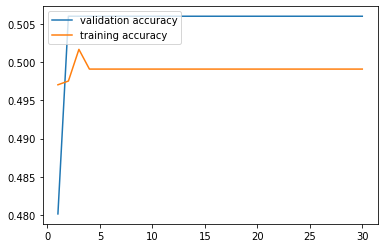

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 1000

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 64
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-2)

# RNN (with vocab min freq = 100 and batch size = 1000 and lr=5e-2 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 18s
train_loss: 1.333, train_acc: 0.503
valid_loss: 0.702, valid_acc: 0.501
Epoch: 02 | Time: 0m 17s
train_loss: 0.933, train_acc: 0.515
valid_loss: 0.697, valid_acc: 0.498
Epoch: 03 | Time: 0m 17s
train_loss: 0.742, train_acc: 0.491
valid_loss: 0.719, valid_acc: 0.497
Epoch: 04 | Time: 0m 17s
train_loss: 0.706, train_acc: 0.505
valid_loss: 0.704, valid_acc: 0.498
Epoch: 05 | Time: 0m 17s
train_loss: 0.701, train_acc: 0.493
valid_loss: 0.703, valid_acc: 0.497
Epoch: 06 | Time: 0m 17s
train_loss: 0.700, train_acc: 0.496
valid_loss: 0.703, valid_acc: 0.497
Epoch: 07 | Time: 0m 17s
train_loss: 0.699, train_acc: 0.497
valid_loss: 0.704, valid_acc: 0.497
Epoch: 08 | Time: 0m 17s
train_loss: 0.700, train_acc: 0.499
valid_loss: 0.704, valid_acc: 0.495
Epoch: 09 | Time: 0m 17s
train_loss: 0.702, train_acc: 0.499
valid_loss: 0.705, valid_acc: 0.494
Epoch: 10 | Time: 0m 17s
train_loss: 0.703, train_acc: 0.499
valid_loss: 0.706, valid_acc: 0.497
Epoch: 11 | Time: 0m 17s
train

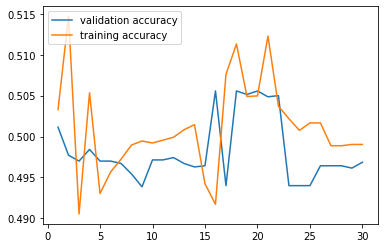

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 1000

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 256
HIDDEN_DIM = 512
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 100 and batch size = 1000 and lr=5e-3 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 8s
train_loss: 0.693, train_acc: 0.501
valid_loss: 0.693, valid_acc: 0.506
Epoch: 02 | Time: 0m 8s
train_loss: 0.693, train_acc: 0.502
valid_loss: 0.695, valid_acc: 0.505
Epoch: 03 | Time: 0m 8s
train_loss: 0.695, train_acc: 0.498
valid_loss: 0.699, valid_acc: 0.477
Epoch: 04 | Time: 0m 8s
train_loss: 0.697, train_acc: 0.492
valid_loss: 0.696, valid_acc: 0.504
Epoch: 05 | Time: 0m 8s
train_loss: 0.695, train_acc: 0.502
valid_loss: 0.702, valid_acc: 0.504
Epoch: 06 | Time: 0m 8s
train_loss: 0.696, train_acc: 0.505
valid_loss: 0.696, valid_acc: 0.504
Epoch: 07 | Time: 0m 8s
train_loss: 0.694, train_acc: 0.501
valid_loss: 0.696, valid_acc: 0.504
Epoch: 08 | Time: 0m 8s
train_loss: 0.694, train_acc: 0.501
valid_loss: 0.696, valid_acc: 0.503
Epoch: 09 | Time: 0m 8s
train_loss: 0.695, train_acc: 0.503
valid_loss: 0.696, valid_acc: 0.503
Epoch: 10 | Time: 0m 8s
train_loss: 0.695, train_acc: 0.504
valid_loss: 0.696, valid_acc: 0.502
Epoch: 11 | Time: 0m 8s
train_loss: 0.69

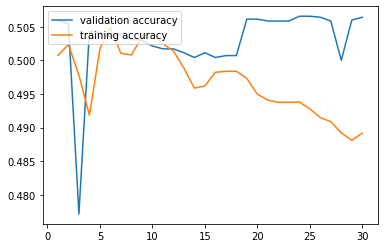

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 1000

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 16
HIDDEN_DIM = 32
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 100 and batch size = 1000 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 8s
train_loss: 0.693, train_acc: 0.501
valid_loss: 0.693, valid_acc: 0.494
Epoch: 02 | Time: 0m 8s
train_loss: 0.693, train_acc: 0.501
valid_loss: 0.693, valid_acc: 0.494
Epoch: 03 | Time: 0m 8s
train_loss: 0.693, train_acc: 0.501
valid_loss: 0.693, valid_acc: 0.494
Epoch: 04 | Time: 0m 8s
train_loss: 0.693, train_acc: 0.501
valid_loss: 0.693, valid_acc: 0.494
Epoch: 05 | Time: 0m 8s
train_loss: 0.693, train_acc: 0.501
valid_loss: 0.693, valid_acc: 0.494
Epoch: 06 | Time: 0m 8s
train_loss: 0.693, train_acc: 0.501
valid_loss: 0.693, valid_acc: 0.494
Epoch: 07 | Time: 0m 8s
train_loss: 0.693, train_acc: 0.501
valid_loss: 0.693, valid_acc: 0.494
Epoch: 08 | Time: 0m 8s
train_loss: 0.693, train_acc: 0.501
valid_loss: 0.693, valid_acc: 0.494
Epoch: 09 | Time: 0m 8s
train_loss: 0.693, train_acc: 0.501
valid_loss: 0.693, valid_acc: 0.494
Epoch: 10 | Time: 0m 8s
train_loss: 0.693, train_acc: 0.501
valid_loss: 0.693, valid_acc: 0.494
Epoch: 11 | Time: 0m 8s
train_loss: 0.69

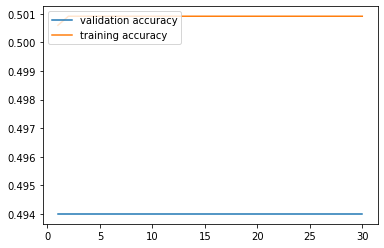

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 1000

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 16
HIDDEN_DIM = 32
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# RNN (with vocab min freq = 100 and batch size = 1000 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 16s
train_loss: 0.694, train_acc: 0.501
valid_loss: 0.693, valid_acc: 0.506
Epoch: 02 | Time: 0m 17s
train_loss: 0.701, train_acc: 0.495
valid_loss: 0.695, valid_acc: 0.496
Epoch: 03 | Time: 0m 17s
train_loss: 0.699, train_acc: 0.501
valid_loss: 0.695, valid_acc: 0.495
Epoch: 04 | Time: 0m 16s
train_loss: 0.698, train_acc: 0.496
valid_loss: 0.700, valid_acc: 0.501
Epoch: 05 | Time: 0m 16s
train_loss: 0.695, train_acc: 0.502
valid_loss: 0.695, valid_acc: 0.502
Epoch: 06 | Time: 0m 17s
train_loss: 0.695, train_acc: 0.501
valid_loss: 0.696, valid_acc: 0.502
Epoch: 07 | Time: 0m 16s
train_loss: 0.695, train_acc: 0.502
valid_loss: 0.696, valid_acc: 0.501
Epoch: 08 | Time: 0m 16s
train_loss: 0.695, train_acc: 0.501
valid_loss: 0.695, valid_acc: 0.500
Epoch: 09 | Time: 0m 16s
train_loss: 0.695, train_acc: 0.501
valid_loss: 0.696, valid_acc: 0.501
Epoch: 10 | Time: 0m 16s
train_loss: 0.695, train_acc: 0.501
valid_loss: 0.695, valid_acc: 0.500
Epoch: 11 | Time: 0m 16s
train

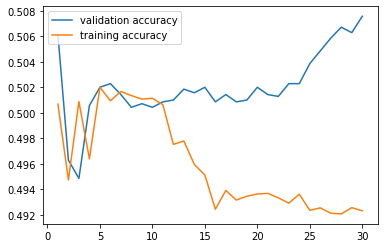

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 1000

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 256
HIDDEN_DIM = 512
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# RNN (with vocab min freq = 100 and batch size = 1000 and lr=5e-3 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 10s
train_loss: 0.693, train_acc: 0.499
valid_loss: 0.693, valid_acc: 0.494
Epoch: 02 | Time: 0m 10s
train_loss: 0.693, train_acc: 0.495
valid_loss: 0.693, valid_acc: 0.494
Epoch: 03 | Time: 0m 10s
train_loss: 0.693, train_acc: 0.496
valid_loss: 0.693, valid_acc: 0.494
Epoch: 04 | Time: 0m 10s
train_loss: 0.693, train_acc: 0.501
valid_loss: 0.693, valid_acc: 0.494
Epoch: 05 | Time: 0m 10s
train_loss: 0.693, train_acc: 0.501
valid_loss: 0.693, valid_acc: 0.494
Epoch: 06 | Time: 0m 10s
train_loss: 0.693, train_acc: 0.501
valid_loss: 0.693, valid_acc: 0.494
Epoch: 07 | Time: 0m 10s
train_loss: 0.693, train_acc: 0.501
valid_loss: 0.693, valid_acc: 0.494
Epoch: 08 | Time: 0m 10s
train_loss: 0.723, train_acc: 0.504
valid_loss: 0.696, valid_acc: 0.509
Epoch: 09 | Time: 0m 10s
train_loss: 0.711, train_acc: 0.497
valid_loss: 0.701, valid_acc: 0.500
Epoch: 10 | Time: 0m 10s
train_loss: 0.697, train_acc: 0.502
valid_loss: 0.695, valid_acc: 0.492
Epoch: 11 | Time: 0m 10s
train

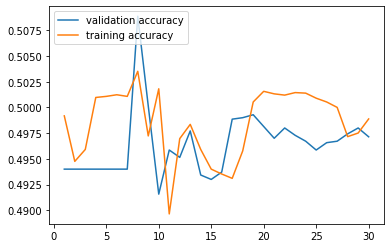

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 1000

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 128
HIDDEN_DIM = 256
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-4)

# RNN (with vocab min freq = 100 and batch size = 1000 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 10s
train_loss: 45.672, train_acc: 0.497
valid_loss: 29.482, valid_acc: 0.506
Epoch: 02 | Time: 0m 10s
train_loss: 12.557, train_acc: 0.500
valid_loss: 12.073, valid_acc: 0.494
Epoch: 03 | Time: 0m 10s
train_loss: 13.398, train_acc: 0.499
valid_loss: 0.705, valid_acc: 0.507
Epoch: 04 | Time: 0m 10s
train_loss: 4.220, train_acc: 0.495
valid_loss: 5.643, valid_acc: 0.507
Epoch: 05 | Time: 0m 10s
train_loss: 4.843, train_acc: 0.506
valid_loss: 3.403, valid_acc: 0.506
Epoch: 06 | Time: 0m 10s
train_loss: 7.931, train_acc: 0.500
valid_loss: 5.081, valid_acc: 0.506
Epoch: 07 | Time: 0m 10s
train_loss: 7.437, train_acc: 0.499
valid_loss: 10.143, valid_acc: 0.494
Epoch: 08 | Time: 0m 10s
train_loss: 7.521, train_acc: 0.500
valid_loss: 7.108, valid_acc: 0.494
Epoch: 09 | Time: 0m 10s
train_loss: 7.343, train_acc: 0.501
valid_loss: 4.863, valid_acc: 0.506
Epoch: 10 | Time: 0m 10s
train_loss: 7.352, train_acc: 0.500
valid_loss: 5.790, valid_acc: 0.506
Epoch: 11 | Time: 0m 10s

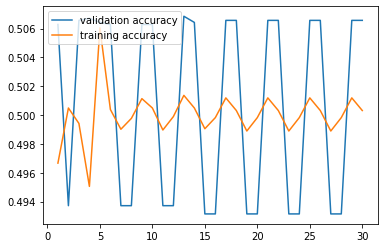

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 1000

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 128
HIDDEN_DIM = 256
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-1)

# RNN (with vocab min freq = 100 and batch size = 1000 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 10s
train_loss: 3.928, train_acc: 0.500
valid_loss: 1.992, valid_acc: 0.494
Epoch: 02 | Time: 0m 10s
train_loss: 0.961, train_acc: 0.497
valid_loss: 0.830, valid_acc: 0.506
Epoch: 03 | Time: 0m 10s
train_loss: 0.746, train_acc: 0.499
valid_loss: 0.710, valid_acc: 0.493
Epoch: 04 | Time: 0m 10s
train_loss: 0.723, train_acc: 0.497
valid_loss: 0.730, valid_acc: 0.493
Epoch: 05 | Time: 0m 10s
train_loss: 0.746, train_acc: 0.500
valid_loss: 0.823, valid_acc: 0.494
Epoch: 06 | Time: 0m 10s
train_loss: 0.796, train_acc: 0.495
valid_loss: 0.795, valid_acc: 0.506
Epoch: 07 | Time: 0m 10s
train_loss: 0.795, train_acc: 0.502
valid_loss: 1.021, valid_acc: 0.494
Epoch: 08 | Time: 0m 10s
train_loss: 0.827, train_acc: 0.500
valid_loss: 0.968, valid_acc: 0.494
Epoch: 09 | Time: 0m 10s
train_loss: 0.824, train_acc: 0.495
valid_loss: 0.780, valid_acc: 0.506
Epoch: 10 | Time: 0m 10s
train_loss: 0.804, train_acc: 0.502
valid_loss: 0.997, valid_acc: 0.494
Epoch: 11 | Time: 0m 10s
train

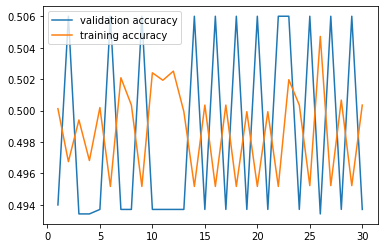

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 1000

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 128
HIDDEN_DIM = 256
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=7.5e-2)

# RNN (with vocab min freq = 100 and batch size = 1000 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 10s
train_loss: 3.568, train_acc: 0.500
valid_loss: 2.140, valid_acc: 0.514
Epoch: 02 | Time: 0m 9s
train_loss: 3.197, train_acc: 0.499
valid_loss: 2.048, valid_acc: 0.507
Epoch: 03 | Time: 0m 9s
train_loss: 2.063, train_acc: 0.499
valid_loss: 1.587, valid_acc: 0.506
Epoch: 04 | Time: 0m 9s
train_loss: 1.384, train_acc: 0.503
valid_loss: 1.077, valid_acc: 0.493
Epoch: 05 | Time: 0m 10s
train_loss: 0.979, train_acc: 0.501
valid_loss: 0.700, valid_acc: 0.506
Epoch: 06 | Time: 0m 10s
train_loss: 0.755, train_acc: 0.502
valid_loss: 0.808, valid_acc: 0.492
Epoch: 07 | Time: 0m 9s
train_loss: 0.756, train_acc: 0.499
valid_loss: 0.733, valid_acc: 0.491
Epoch: 08 | Time: 0m 9s
train_loss: 0.726, train_acc: 0.501
valid_loss: 0.714, valid_acc: 0.496
Epoch: 09 | Time: 0m 9s
train_loss: 0.727, train_acc: 0.504
valid_loss: 0.721, valid_acc: 0.508
Epoch: 10 | Time: 0m 10s
train_loss: 0.708, train_acc: 0.506
valid_loss: 0.721, valid_acc: 0.492
Epoch: 11 | Time: 0m 9s
train_loss: 

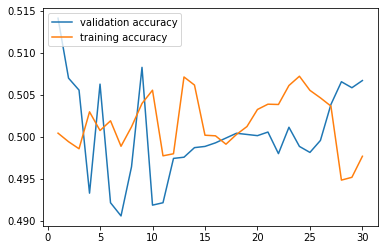

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 1000

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 200
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-2)

# RNN (with vocab min freq = 100 and batch size = 1000 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 10s
train_loss: 4.761, train_acc: 0.503
valid_loss: 4.262, valid_acc: 0.498
Epoch: 02 | Time: 0m 10s
train_loss: 2.295, train_acc: 0.497
valid_loss: 1.645, valid_acc: 0.499
Epoch: 03 | Time: 0m 10s
train_loss: 0.979, train_acc: 0.490
valid_loss: 0.807, valid_acc: 0.497
Epoch: 04 | Time: 0m 10s
train_loss: 0.884, train_acc: 0.501
valid_loss: 0.837, valid_acc: 0.500
Epoch: 05 | Time: 0m 9s
train_loss: 0.763, train_acc: 0.501
valid_loss: 0.782, valid_acc: 0.500
Epoch: 06 | Time: 0m 10s
train_loss: 0.753, train_acc: 0.500
valid_loss: 0.724, valid_acc: 0.500
Epoch: 07 | Time: 0m 10s
train_loss: 0.702, train_acc: 0.500
valid_loss: 0.698, valid_acc: 0.501
Epoch: 08 | Time: 0m 10s
train_loss: 0.699, train_acc: 0.497
valid_loss: 0.697, valid_acc: 0.501
Epoch: 09 | Time: 0m 10s
train_loss: 0.706, train_acc: 0.494
valid_loss: 0.706, valid_acc: 0.500
Epoch: 10 | Time: 0m 10s
train_loss: 0.715, train_acc: 0.495
valid_loss: 0.721, valid_acc: 0.500
Epoch: 11 | Time: 0m 10s
train_

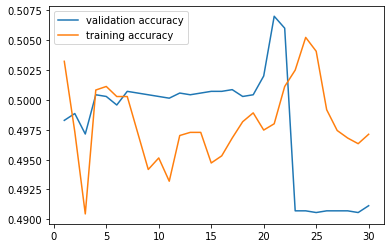

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 1000

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 200
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-2)

# RNN (with vocab min freq = 50 and batch size = 1000 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 10s
train_loss: 3.339, train_acc: 0.497
valid_loss: 3.597, valid_acc: 0.507
Epoch: 02 | Time: 0m 10s
train_loss: 2.332, train_acc: 0.505
valid_loss: 0.707, valid_acc: 0.497
Epoch: 03 | Time: 0m 10s
train_loss: 0.731, train_acc: 0.507
valid_loss: 0.713, valid_acc: 0.497
Epoch: 04 | Time: 0m 10s
train_loss: 0.706, train_acc: 0.496
valid_loss: 0.695, valid_acc: 0.499
Epoch: 05 | Time: 0m 10s
train_loss: 0.712, train_acc: 0.498
valid_loss: 0.733, valid_acc: 0.499
Epoch: 06 | Time: 0m 10s
train_loss: 0.722, train_acc: 0.506
valid_loss: 0.741, valid_acc: 0.499
Epoch: 07 | Time: 0m 10s
train_loss: 0.707, train_acc: 0.503
valid_loss: 0.696, valid_acc: 0.499
Epoch: 08 | Time: 0m 10s
train_loss: 0.704, train_acc: 0.502
valid_loss: 0.705, valid_acc: 0.499
Epoch: 09 | Time: 0m 10s
train_loss: 0.708, train_acc: 0.500
valid_loss: 0.740, valid_acc: 0.499
Epoch: 10 | Time: 0m 10s
train_loss: 0.718, train_acc: 0.500
valid_loss: 0.730, valid_acc: 0.499
Epoch: 11 | Time: 0m 10s
train

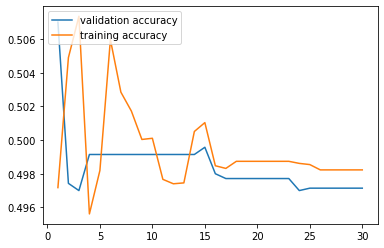

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 1000

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 200
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-2)

# RNN (with vocab min freq = 1000 and batch size = 1000 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 9s
train_loss: 1.388, train_acc: 0.498
valid_loss: 1.135, valid_acc: 0.494
Epoch: 02 | Time: 0m 9s
train_loss: 0.826, train_acc: 0.497
valid_loss: 0.724, valid_acc: 0.492
Epoch: 03 | Time: 0m 9s
train_loss: 0.728, train_acc: 0.495
valid_loss: 0.705, valid_acc: 0.505
Epoch: 04 | Time: 0m 9s
train_loss: 0.724, train_acc: 0.500
valid_loss: 0.693, valid_acc: 0.509
Epoch: 05 | Time: 0m 9s
train_loss: 0.993, train_acc: 0.501
valid_loss: 0.832, valid_acc: 0.507
Epoch: 06 | Time: 0m 9s
train_loss: 0.919, train_acc: 0.498
valid_loss: 0.720, valid_acc: 0.502
Epoch: 07 | Time: 0m 9s
train_loss: 0.750, train_acc: 0.495
valid_loss: 0.736, valid_acc: 0.505
Epoch: 08 | Time: 0m 9s
train_loss: 0.719, train_acc: 0.507
valid_loss: 0.708, valid_acc: 0.491
Epoch: 09 | Time: 0m 9s
train_loss: 0.705, train_acc: 0.497
valid_loss: 0.701, valid_acc: 0.508
Epoch: 10 | Time: 0m 9s
train_loss: 0.700, train_acc: 0.493
valid_loss: 0.701, valid_acc: 0.513
Epoch: 11 | Time: 0m 9s
train_loss: 0.70

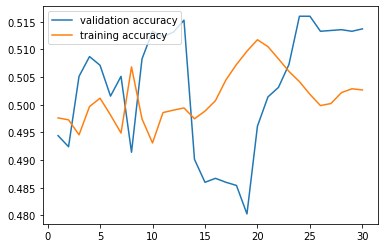

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 1000

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 100
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-2)

# RNN (with vocab min freq = 1000 and batch size = 1000 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 10s
train_loss: 2.424, train_acc: 0.496
valid_loss: 1.212, valid_acc: 0.493
Epoch: 02 | Time: 0m 10s
train_loss: 1.129, train_acc: 0.504
valid_loss: 0.949, valid_acc: 0.504
Epoch: 03 | Time: 0m 10s
train_loss: 0.784, train_acc: 0.506
valid_loss: 0.792, valid_acc: 0.504
Epoch: 04 | Time: 0m 10s
train_loss: 0.754, train_acc: 0.501
valid_loss: 0.720, valid_acc: 0.503
Epoch: 05 | Time: 0m 10s
train_loss: 0.721, train_acc: 0.497
valid_loss: 0.703, valid_acc: 0.493
Epoch: 06 | Time: 0m 10s
train_loss: 0.717, train_acc: 0.501
valid_loss: 0.715, valid_acc: 0.497
Epoch: 07 | Time: 0m 10s
train_loss: 0.732, train_acc: 0.505
valid_loss: 0.720, valid_acc: 0.496
Epoch: 08 | Time: 0m 10s
train_loss: 0.736, train_acc: 0.500
valid_loss: 0.710, valid_acc: 0.507
Epoch: 09 | Time: 0m 10s
train_loss: 0.724, train_acc: 0.502
valid_loss: 0.713, valid_acc: 0.504
Epoch: 10 | Time: 0m 10s
train_loss: 0.706, train_acc: 0.504
valid_loss: 0.703, valid_acc: 0.507
Epoch: 11 | Time: 0m 10s
train

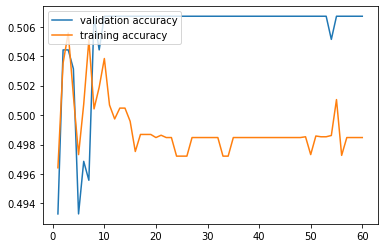

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 1000

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 200
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-2)

# RNN (with vocab min freq = 1000 and batch size = 1000 and all examples)
N_EPOCHS = 60
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 9s
train_loss: 2.844, train_acc: 0.498
valid_loss: 2.640, valid_acc: 0.497
Epoch: 02 | Time: 0m 9s
train_loss: 1.502, train_acc: 0.497
valid_loss: 1.325, valid_acc: 0.494
Epoch: 03 | Time: 0m 9s
train_loss: 0.935, train_acc: 0.502
valid_loss: 0.767, valid_acc: 0.511
Epoch: 04 | Time: 0m 9s
train_loss: 0.740, train_acc: 0.498
valid_loss: 0.701, valid_acc: 0.506
Epoch: 05 | Time: 0m 9s
train_loss: 0.710, train_acc: 0.507
valid_loss: 0.704, valid_acc: 0.498
Epoch: 06 | Time: 0m 9s
train_loss: 0.703, train_acc: 0.500
valid_loss: 0.702, valid_acc: 0.503
Epoch: 07 | Time: 0m 9s
train_loss: 0.697, train_acc: 0.508
valid_loss: 0.694, valid_acc: 0.507
Epoch: 08 | Time: 0m 9s
train_loss: 0.697, train_acc: 0.500
valid_loss: 0.693, valid_acc: 0.497
Epoch: 09 | Time: 0m 9s
train_loss: 0.699, train_acc: 0.495
valid_loss: 0.694, valid_acc: 0.497
Epoch: 10 | Time: 0m 8s
train_loss: 0.698, train_acc: 0.502
valid_loss: 0.696, valid_acc: 0.502
Epoch: 11 | Time: 0m 9s
train_loss: 0.70

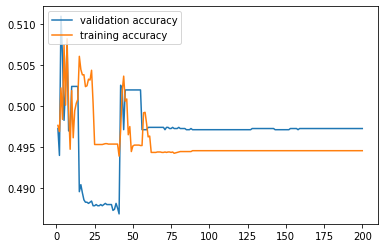

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 1000

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 100
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-2)

# RNN (with vocab min freq = 1000 and batch size = 1000 and all examples)
N_EPOCHS = 200
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 17s
train_loss: 0.720, train_acc: 0.500
valid_loss: 0.695, valid_acc: 0.498
Epoch: 02 | Time: 0m 17s
train_loss: 0.718, train_acc: 0.500
valid_loss: 0.696, valid_acc: 0.498
Epoch: 03 | Time: 0m 16s
train_loss: 0.718, train_acc: 0.499
valid_loss: 0.695, valid_acc: 0.497
Epoch: 04 | Time: 0m 15s
train_loss: 0.718, train_acc: 0.498
valid_loss: 0.696, valid_acc: 0.498
Epoch: 05 | Time: 0m 16s
train_loss: 0.717, train_acc: 0.499
valid_loss: 0.700, valid_acc: 0.497
Epoch: 06 | Time: 0m 16s
train_loss: 0.714, train_acc: 0.499
valid_loss: 0.694, valid_acc: 0.497
Epoch: 07 | Time: 0m 16s
train_loss: 0.710, train_acc: 0.502
valid_loss: 0.696, valid_acc: 0.496
Epoch: 08 | Time: 0m 16s
train_loss: 0.709, train_acc: 0.500
valid_loss: 0.695, valid_acc: 0.501
Epoch: 09 | Time: 0m 15s
train_loss: 0.705, train_acc: 0.499
valid_loss: 0.696, valid_acc: 0.498
Epoch: 10 | Time: 0m 16s
train_loss: 0.712, train_acc: 0.503
valid_loss: 0.708, valid_acc: 0.497
Epoch: 11 | Time: 0m 16s
train

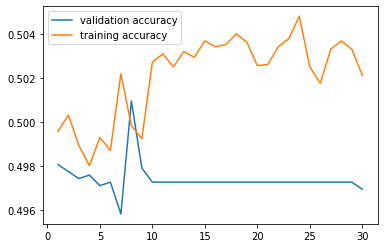

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 50

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 1000 and batch size = 50 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 50

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=7.5e-3)

# RNN (with vocab min freq = 1000 and batch size = 50 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 15s
train_loss: 0.749, train_acc: 0.496
valid_loss: 0.746, valid_acc: 0.493
Epoch: 02 | Time: 0m 16s
train_loss: 0.736, train_acc: 0.497
valid_loss: 0.715, valid_acc: 0.492
Epoch: 03 | Time: 0m 16s
train_loss: 0.727, train_acc: 0.498
valid_loss: 0.711, valid_acc: 0.492
Epoch: 04 | Time: 0m 15s
train_loss: 0.726, train_acc: 0.496
valid_loss: 0.713, valid_acc: 0.492
Epoch: 05 | Time: 0m 16s
train_loss: 0.728, train_acc: 0.499
valid_loss: 0.713, valid_acc: 0.496
Epoch: 06 | Time: 0m 16s
train_loss: 0.742, train_acc: 0.500
valid_loss: 0.765, valid_acc: 0.496
Epoch: 07 | Time: 0m 15s
train_loss: 0.717, train_acc: 0.501
valid_loss: 0.714, valid_acc: 0.500
Epoch: 08 | Time: 0m 16s
train_loss: 0.718, train_acc: 0.499
valid_loss: 0.711, valid_acc: 0.500
Epoch: 09 | Time: 0m 16s
train_loss: 0.720, train_acc: 0.498
valid_loss: 0.714, valid_acc: 0.500
Epoch: 10 | Time: 0m 16s
train_loss: 0.718, train_acc: 0.499
valid_loss: 0.705, valid_acc: 0.500
Epoch: 11 | Time: 0m 15s
train

KeyboardInterrupt: ignored

Epoch: 01 | Time: 0m 17s
train_loss: 0.720, train_acc: 0.492
valid_loss: 0.703, valid_acc: 0.503
Epoch: 02 | Time: 0m 16s
train_loss: 0.717, train_acc: 0.500
valid_loss: 0.703, valid_acc: 0.503
Epoch: 03 | Time: 0m 16s
train_loss: 0.717, train_acc: 0.498
valid_loss: 0.704, valid_acc: 0.503
Epoch: 04 | Time: 0m 16s
train_loss: 0.717, train_acc: 0.498
valid_loss: 0.704, valid_acc: 0.503
Epoch: 05 | Time: 0m 16s
train_loss: 0.717, train_acc: 0.498
valid_loss: 0.705, valid_acc: 0.503
Epoch: 06 | Time: 0m 16s
train_loss: 0.717, train_acc: 0.498
valid_loss: 0.708, valid_acc: 0.503
Epoch: 07 | Time: 0m 17s
train_loss: 0.719, train_acc: 0.498
valid_loss: 0.707, valid_acc: 0.503
Epoch: 08 | Time: 0m 18s
train_loss: 0.719, train_acc: 0.499
valid_loss: 0.705, valid_acc: 0.503
Epoch: 09 | Time: 0m 16s
train_loss: 0.720, train_acc: 0.501
valid_loss: 0.705, valid_acc: 0.503
Epoch: 10 | Time: 0m 16s
train_loss: 0.720, train_acc: 0.500
valid_loss: 0.705, valid_acc: 0.502
Epoch: 11 | Time: 0m 16s
train

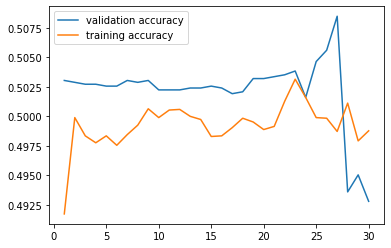

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 50

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 500 and batch size = 50 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 12s
train_loss: 0.715, train_acc: 0.501
valid_loss: 0.701, valid_acc: 0.505
Epoch: 02 | Time: 0m 12s
train_loss: 0.704, train_acc: 0.495
valid_loss: 0.708, valid_acc: 0.512
Epoch: 03 | Time: 0m 12s
train_loss: 0.708, train_acc: 0.502
valid_loss: 0.733, valid_acc: 0.484
Epoch: 04 | Time: 0m 12s
train_loss: 0.704, train_acc: 0.500
valid_loss: 0.735, valid_acc: 0.484
Epoch: 05 | Time: 0m 12s
train_loss: 0.703, train_acc: 0.502
valid_loss: 0.735, valid_acc: 0.484
Epoch: 06 | Time: 0m 12s
train_loss: 0.703, train_acc: 0.503
valid_loss: 0.736, valid_acc: 0.484
Epoch: 07 | Time: 0m 12s
train_loss: 0.703, train_acc: 0.503
valid_loss: 0.738, valid_acc: 0.484
Epoch: 08 | Time: 0m 12s
train_loss: 0.703, train_acc: 0.504
valid_loss: 0.738, valid_acc: 0.484
Epoch: 09 | Time: 0m 12s
train_loss: 0.703, train_acc: 0.502
valid_loss: 0.739, valid_acc: 0.483
Epoch: 10 | Time: 0m 12s
train_loss: 0.703, train_acc: 0.504
valid_loss: 0.740, valid_acc: 0.483
Epoch: 11 | Time: 0m 12s
train

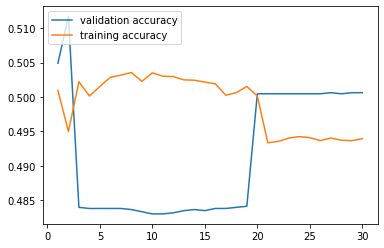

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 100

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 500 and batch size = 100 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 10s
train_loss: 0.714, train_acc: 0.501
valid_loss: 0.695, valid_acc: 0.497
Epoch: 02 | Time: 0m 10s
train_loss: 0.706, train_acc: 0.505
valid_loss: 0.699, valid_acc: 0.505
Epoch: 03 | Time: 0m 10s
train_loss: 0.698, train_acc: 0.501
valid_loss: 0.699, valid_acc: 0.503
Epoch: 04 | Time: 0m 10s
train_loss: 0.697, train_acc: 0.499
valid_loss: 0.695, valid_acc: 0.496
Epoch: 05 | Time: 0m 10s
train_loss: 0.699, train_acc: 0.495
valid_loss: 0.695, valid_acc: 0.497
Epoch: 06 | Time: 0m 10s
train_loss: 0.700, train_acc: 0.498
valid_loss: 0.695, valid_acc: 0.497
Epoch: 07 | Time: 0m 10s
train_loss: 0.699, train_acc: 0.500
valid_loss: 0.695, valid_acc: 0.500
Epoch: 08 | Time: 0m 10s
train_loss: 0.699, train_acc: 0.501
valid_loss: 0.697, valid_acc: 0.498
Epoch: 09 | Time: 0m 10s
train_loss: 0.699, train_acc: 0.495
valid_loss: 0.699, valid_acc: 0.499
Epoch: 10 | Time: 0m 10s
train_loss: 0.698, train_acc: 0.504
valid_loss: 0.699, valid_acc: 0.496
Epoch: 11 | Time: 0m 10s
train

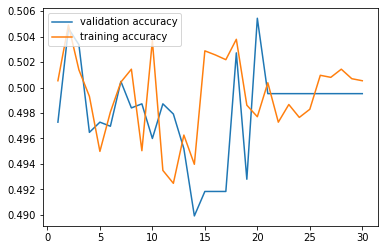

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 250

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 500 and batch size = 250 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 9s
train_loss: 0.712, train_acc: 0.500
valid_loss: 0.732, valid_acc: 0.503
Epoch: 02 | Time: 0m 10s
train_loss: 0.723, train_acc: 0.498
valid_loss: 0.715, valid_acc: 0.506
Epoch: 03 | Time: 0m 9s
train_loss: 0.705, train_acc: 0.494
valid_loss: 0.694, valid_acc: 0.496
Epoch: 04 | Time: 0m 9s
train_loss: 0.703, train_acc: 0.503
valid_loss: 0.699, valid_acc: 0.495
Epoch: 05 | Time: 0m 9s
train_loss: 0.704, train_acc: 0.504
valid_loss: 0.701, valid_acc: 0.493
Epoch: 06 | Time: 0m 9s
train_loss: 0.704, train_acc: 0.505
valid_loss: 0.702, valid_acc: 0.494
Epoch: 07 | Time: 0m 9s
train_loss: 0.703, train_acc: 0.504
valid_loss: 0.703, valid_acc: 0.494
Epoch: 08 | Time: 0m 9s
train_loss: 0.702, train_acc: 0.504
valid_loss: 0.702, valid_acc: 0.494
Epoch: 09 | Time: 0m 9s
train_loss: 0.702, train_acc: 0.506
valid_loss: 0.703, valid_acc: 0.494
Epoch: 10 | Time: 0m 9s
train_loss: 0.701, train_acc: 0.505
valid_loss: 0.702, valid_acc: 0.493
Epoch: 11 | Time: 0m 9s
train_loss: 0.7

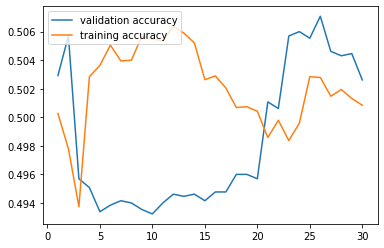

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 500

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 500 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 16s
train_loss: 0.710, train_acc: 0.503
valid_loss: 0.707, valid_acc: 0.505
Epoch: 02 | Time: 0m 16s
train_loss: 0.711, train_acc: 0.504
valid_loss: 0.699, valid_acc: 0.505
Epoch: 03 | Time: 0m 15s
train_loss: 0.708, train_acc: 0.503
valid_loss: 0.696, valid_acc: 0.506
Epoch: 04 | Time: 0m 16s
train_loss: 0.706, train_acc: 0.498
valid_loss: 0.696, valid_acc: 0.506
Epoch: 05 | Time: 0m 16s
train_loss: 0.706, train_acc: 0.502
valid_loss: 0.696, valid_acc: 0.505
Epoch: 06 | Time: 0m 16s
train_loss: 0.706, train_acc: 0.500
valid_loss: 0.696, valid_acc: 0.506
Epoch: 07 | Time: 0m 16s
train_loss: 0.708, train_acc: 0.503
valid_loss: 0.694, valid_acc: 0.505
Epoch: 08 | Time: 0m 16s
train_loss: 0.706, train_acc: 0.506
valid_loss: 0.694, valid_acc: 0.496
Epoch: 09 | Time: 0m 16s
train_loss: 0.708, train_acc: 0.507
valid_loss: 0.693, valid_acc: 0.508
Epoch: 10 | Time: 0m 16s
train_loss: 0.708, train_acc: 0.512
valid_loss: 0.694, valid_acc: 0.506
Epoch: 11 | Time: 0m 16s
train

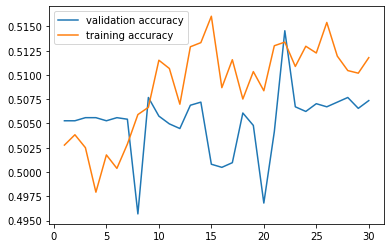

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 50

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 50 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 16s
train_loss: 0.715, train_acc: 0.501
valid_loss: 0.719, valid_acc: 0.500
Epoch: 02 | Time: 0m 16s
train_loss: 0.707, train_acc: 0.492
valid_loss: 0.697, valid_acc: 0.503
Epoch: 03 | Time: 0m 16s
train_loss: 0.710, train_acc: 0.501
valid_loss: 0.710, valid_acc: 0.502
Epoch: 04 | Time: 0m 16s
train_loss: 0.707, train_acc: 0.498
valid_loss: 0.715, valid_acc: 0.502
Epoch: 05 | Time: 0m 16s
train_loss: 0.705, train_acc: 0.497
valid_loss: 0.721, valid_acc: 0.502
Epoch: 06 | Time: 0m 16s
train_loss: 0.704, train_acc: 0.495
valid_loss: 0.723, valid_acc: 0.503
Epoch: 07 | Time: 0m 16s
train_loss: 0.704, train_acc: 0.497
valid_loss: 0.721, valid_acc: 0.502
Epoch: 08 | Time: 0m 16s
train_loss: 0.703, train_acc: 0.495
valid_loss: 0.730, valid_acc: 0.501
Epoch: 09 | Time: 0m 16s
train_loss: 0.703, train_acc: 0.495
valid_loss: 0.727, valid_acc: 0.502
Epoch: 10 | Time: 0m 16s
train_loss: 0.703, train_acc: 0.494
valid_loss: 0.725, valid_acc: 0.503
Epoch: 11 | Time: 0m 16s
train

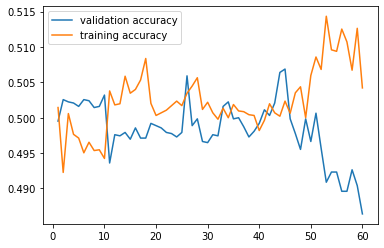

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 50

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 50 and all examples)
N_EPOCHS = 60
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 18s
train_loss: 0.717, train_acc: 0.500
valid_loss: 0.759, valid_acc: 0.497
Epoch: 02 | Time: 0m 16s
train_loss: 0.715, train_acc: 0.497
valid_loss: 0.745, valid_acc: 0.497
Epoch: 03 | Time: 0m 16s
train_loss: 0.713, train_acc: 0.497
valid_loss: 0.748, valid_acc: 0.498
Epoch: 04 | Time: 0m 16s
train_loss: 0.711, train_acc: 0.494
valid_loss: 0.771, valid_acc: 0.494
Epoch: 05 | Time: 0m 18s
train_loss: 0.709, train_acc: 0.496
valid_loss: 0.742, valid_acc: 0.495
Epoch: 06 | Time: 0m 17s
train_loss: 0.707, train_acc: 0.505
valid_loss: 0.694, valid_acc: 0.503
Epoch: 07 | Time: 0m 16s
train_loss: 0.705, train_acc: 0.497
valid_loss: 0.695, valid_acc: 0.503
Epoch: 08 | Time: 0m 16s
train_loss: 0.705, train_acc: 0.497
valid_loss: 0.695, valid_acc: 0.503
Epoch: 09 | Time: 0m 16s
train_loss: 0.705, train_acc: 0.499
valid_loss: 0.693, valid_acc: 0.504
Epoch: 10 | Time: 0m 16s
train_loss: 0.705, train_acc: 0.500
valid_loss: 0.694, valid_acc: 0.503
Epoch: 11 | Time: 0m 16s
train

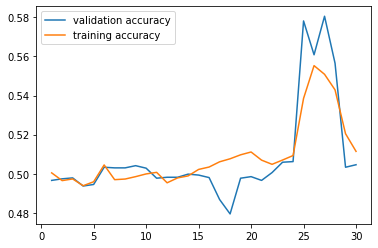

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 50

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 50 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 27s
train_loss: 0.727, train_acc: 0.496
valid_loss: 0.762, valid_acc: 0.506
Epoch: 02 | Time: 0m 27s
train_loss: 0.729, train_acc: 0.498
valid_loss: 0.741, valid_acc: 0.508
Epoch: 03 | Time: 0m 27s
train_loss: 0.728, train_acc: 0.498
valid_loss: 0.724, valid_acc: 0.509
Epoch: 04 | Time: 0m 27s
train_loss: 0.727, train_acc: 0.496
valid_loss: 0.695, valid_acc: 0.520
Epoch: 05 | Time: 0m 27s
train_loss: 0.727, train_acc: 0.506
valid_loss: 0.693, valid_acc: 0.517
Epoch: 06 | Time: 0m 27s
train_loss: 0.719, train_acc: 0.509
valid_loss: 0.694, valid_acc: 0.505
Epoch: 07 | Time: 0m 28s
train_loss: 0.721, train_acc: 0.509
valid_loss: 0.706, valid_acc: 0.503
Epoch: 08 | Time: 0m 27s
train_loss: 0.716, train_acc: 0.513
valid_loss: 0.706, valid_acc: 0.503
Epoch: 09 | Time: 0m 27s
train_loss: 0.716, train_acc: 0.513
valid_loss: 0.704, valid_acc: 0.502
Epoch: 10 | Time: 0m 28s
train_loss: 0.714, train_acc: 0.515
valid_loss: 0.705, valid_acc: 0.503
Epoch: 11 | Time: 0m 28s
train

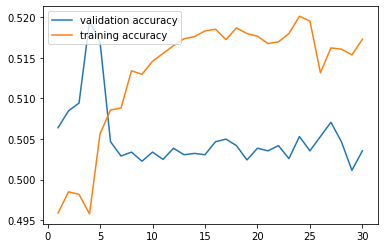

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 16

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 50 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 27s
train_loss: 0.729, train_acc: 0.501
valid_loss: 0.791, valid_acc: 0.496
Epoch: 02 | Time: 0m 27s
train_loss: 0.729, train_acc: 0.501
valid_loss: 0.732, valid_acc: 0.493
Epoch: 03 | Time: 0m 27s
train_loss: 0.728, train_acc: 0.500
valid_loss: 0.728, valid_acc: 0.495
Epoch: 04 | Time: 0m 28s
train_loss: 0.725, train_acc: 0.502
valid_loss: 0.714, valid_acc: 0.495
Epoch: 05 | Time: 0m 28s
train_loss: 0.729, train_acc: 0.502
valid_loss: 0.709, valid_acc: 0.494
Epoch: 06 | Time: 0m 28s
train_loss: 0.729, train_acc: 0.499
valid_loss: 0.698, valid_acc: 0.501
Epoch: 07 | Time: 0m 32s
train_loss: 0.729, train_acc: 0.502
valid_loss: 0.694, valid_acc: 0.500
Epoch: 08 | Time: 0m 28s
train_loss: 0.725, train_acc: 0.505
valid_loss: 0.699, valid_acc: 0.505
Epoch: 09 | Time: 0m 28s
train_loss: 0.726, train_acc: 0.499
valid_loss: 0.700, valid_acc: 0.505
Epoch: 10 | Time: 0m 27s
train_loss: 0.724, train_acc: 0.502
valid_loss: 0.709, valid_acc: 0.505
Epoch: 11 | Time: 0m 28s
train

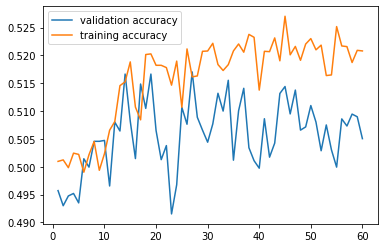

In [ ]:
# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 16

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 50 and all examples)
N_EPOCHS = 60
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 16

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 50 and all examples)
N_EPOCHS = 720
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('RNN for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 46s
train_loss: 0.732, train_acc: 0.498
valid_loss: 0.784, valid_acc: 0.509
test_loss: 0.799, test_acc: 0.496
Epoch: 02 | Time: 0m 45s
train_loss: 0.733, train_acc: 0.495
valid_loss: 0.780, valid_acc: 0.510
test_loss: 0.794, test_acc: 0.496
Epoch: 03 | Time: 0m 44s
train_loss: 0.731, train_acc: 0.494
valid_loss: 0.739, valid_acc: 0.508
test_loss: 0.743, test_acc: 0.496
Epoch: 04 | Time: 0m 44s
train_loss: 0.727, train_acc: 0.501
valid_loss: 0.702, valid_acc: 0.510
test_loss: 0.705, test_acc: 0.496
Epoch: 05 | Time: 0m 44s
train_loss: 0.725, train_acc: 0.503
valid_loss: 0.731, valid_acc: 0.505
test_loss: 0.730, test_acc: 0.497
Epoch: 06 | Time: 0m 45s
train_loss: 0.721, train_acc: 0.507
valid_loss: 0.708, valid_acc: 0.500
test_loss: 0.708, test_acc: 0.502
Epoch: 07 | Time: 0m 45s
train_loss: 0.721, train_acc: 0.508
valid_loss: 0.731, valid_acc: 0.503
test_loss: 0.733, test_acc: 0.495
Epoch: 08 | Time: 0m 44s
train_loss: 0.717, train_acc: 0.513
valid_loss: 0.746, val

KeyboardInterrupt: ignored

Epoch: 01 | Time: 0m 21s
train_loss: 0.693, train_acc: 0.498
valid_loss: 0.693, valid_acc: 0.496
Epoch: 02 | Time: 0m 23s
train_loss: 0.694, train_acc: 0.500
valid_loss: 0.693, valid_acc: 0.494
Epoch: 03 | Time: 0m 23s
train_loss: 0.692, train_acc: 0.500
valid_loss: 0.695, valid_acc: 0.502
Epoch: 04 | Time: 0m 21s
train_loss: 0.690, train_acc: 0.506
valid_loss: 0.696, valid_acc: 0.504
Epoch: 05 | Time: 0m 20s
train_loss: 0.686, train_acc: 0.512
valid_loss: 0.699, valid_acc: 0.505
Epoch: 06 | Time: 0m 20s
train_loss: 0.721, train_acc: 0.508
valid_loss: 0.742, valid_acc: 0.490
Epoch: 07 | Time: 0m 20s
train_loss: 0.698, train_acc: 0.505
valid_loss: 0.723, valid_acc: 0.487
Epoch: 08 | Time: 0m 21s
train_loss: 0.704, train_acc: 0.509
valid_loss: 0.707, valid_acc: 0.494
Epoch: 09 | Time: 0m 21s
train_loss: 0.696, train_acc: 0.504
valid_loss: 0.703, valid_acc: 0.493
Epoch: 10 | Time: 0m 20s
train_loss: 0.692, train_acc: 0.507
valid_loss: 0.699, valid_acc: 0.493
Epoch: 11 | Time: 0m 20s
train

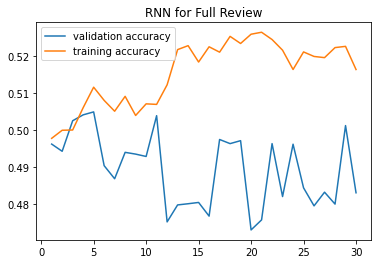

In [ ]:
# with grad clipping

# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-4)

# RNN (with vocab min freq = 50 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('RNN for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

In [ ]:
# with grad clipping

# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 50 and all examples)
N_EPOCHS = 90
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('RNN for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 22s
train_loss: 0.731, train_acc: 0.500
valid_loss: 0.741, valid_acc: 0.504
Epoch: 02 | Time: 0m 22s
train_loss: 0.733, train_acc: 0.502
valid_loss: 0.721, valid_acc: 0.493
Epoch: 03 | Time: 0m 22s
train_loss: 0.725, train_acc: 0.501
valid_loss: 0.735, valid_acc: 0.504
Epoch: 04 | Time: 0m 22s
train_loss: 0.723, train_acc: 0.504
valid_loss: 0.730, valid_acc: 0.502
Epoch: 05 | Time: 0m 21s
train_loss: 0.726, train_acc: 0.508
valid_loss: 0.694, valid_acc: 0.504
Epoch: 06 | Time: 0m 21s
train_loss: 0.720, train_acc: 0.505
valid_loss: 0.694, valid_acc: 0.503
Epoch: 07 | Time: 0m 21s
train_loss: 0.721, train_acc: 0.502
valid_loss: 0.700, valid_acc: 0.499
Epoch: 08 | Time: 0m 21s
train_loss: 0.721, train_acc: 0.499
valid_loss: 0.734, valid_acc: 0.503
Epoch: 09 | Time: 0m 21s
train_loss: 0.714, train_acc: 0.493
valid_loss: 0.725, valid_acc: 0.504
Epoch: 10 | Time: 0m 21s
train_loss: 0.716, train_acc: 0.502
valid_loss: 0.724, valid_acc: 0.504
Epoch: 11 | Time: 0m 21s
train

Epoch: 01 | Time: 0m 24s
train_loss: 0.735, train_acc: 0.497
valid_loss: 0.723, valid_acc: 0.505
Epoch: 02 | Time: 0m 26s
train_loss: 0.741, train_acc: 0.497
valid_loss: 0.747, valid_acc: 0.495
Epoch: 03 | Time: 0m 26s
train_loss: 0.744, train_acc: 0.499
valid_loss: 0.748, valid_acc: 0.497
Epoch: 04 | Time: 0m 22s
train_loss: 0.741, train_acc: 0.499
valid_loss: 0.722, valid_acc: 0.500
Epoch: 05 | Time: 0m 22s
train_loss: 0.741, train_acc: 0.500
valid_loss: 0.721, valid_acc: 0.506
Epoch: 06 | Time: 0m 23s
train_loss: 0.747, train_acc: 0.495
valid_loss: 0.721, valid_acc: 0.500
Epoch: 07 | Time: 0m 22s
train_loss: 0.743, train_acc: 0.500
valid_loss: 0.705, valid_acc: 0.504
Epoch: 08 | Time: 0m 22s
train_loss: 0.750, train_acc: 0.493
valid_loss: 0.706, valid_acc: 0.486
Epoch: 09 | Time: 0m 22s
train_loss: 0.752, train_acc: 0.497
valid_loss: 0.711, valid_acc: 0.488
Epoch: 10 | Time: 0m 22s
train_loss: 0.744, train_acc: 0.503
valid_loss: 0.704, valid_acc: 0.500
Epoch: 11 | Time: 0m 22s
train

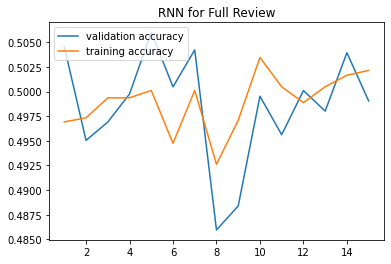

In [ ]:
# with grad clipping and dropout = 0.10

# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 16

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 50 and all examples)
N_EPOCHS = 15
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'RNN-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('RNN for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 39s
train_loss: 0.736, train_acc: 0.500
valid_loss: 0.703, valid_acc: 0.512
test_loss: 0.707, test_acc: 0.500
Epoch: 02 | Time: 0m 36s
train_loss: 0.746, train_acc: 0.500
valid_loss: 0.697, valid_acc: 0.512
test_loss: 0.699, test_acc: 0.497
Epoch: 03 | Time: 0m 36s
train_loss: 0.743, train_acc: 0.504
valid_loss: 0.771, valid_acc: 0.488
test_loss: 0.760, test_acc: 0.503
Epoch: 04 | Time: 0m 36s
train_loss: 0.735, train_acc: 0.509
valid_loss: 0.703, valid_acc: 0.502
test_loss: 0.701, test_acc: 0.506
Epoch: 05 | Time: 0m 36s
train_loss: 0.739, train_acc: 0.502
valid_loss: 0.717, valid_acc: 0.502
test_loss: 0.717, test_acc: 0.500
Epoch: 06 | Time: 0m 36s
train_loss: 0.736, train_acc: 0.506
valid_loss: 0.719, valid_acc: 0.513
test_loss: 0.727, test_acc: 0.498
Epoch: 07 | Time: 0m 36s
train_loss: 0.743, train_acc: 0.504
valid_loss: 0.728, valid_acc: 0.504
test_loss: 0.726, test_acc: 0.505
Epoch: 08 | Time: 0m 36s
train_loss: 0.740, train_acc: 0.498
valid_loss: 0.807, val

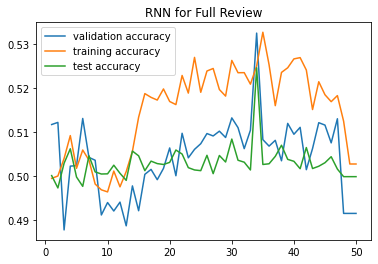

In [ ]:
# with grad clipping and dropout = 0.10

from torch.utils.data import DataLoader

BATCH_SIZE = 16

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 50 and all examples)
N_EPOCHS = 50
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'RNN-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('RNN for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")

In [ ]:
# with grad clipping and dropout = 0.75

from torch.utils.data import DataLoader

BATCH_SIZE = 16

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 50 and all examples)
N_EPOCHS = 50
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []
train_losses = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    train_losses.append(train_loss)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'RNN-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('RNN for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")

In [ ]:
plt.title('RNN Loss for Full Review')
plt.plot(range(1, N_EPOCHS+1), train_losses, label = 'training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper left")

In [ ]:
model.load_state_dict(torch.load('RNN-model.pt'))
test_loss, test_acc = evaluate(test_dataloader)
print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')